In [2]:
import pandas as pd

In [3]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
# now let's start cleaing up the data

In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [7]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [8]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [9]:
diabetes[cols_to_norm].head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638


In [10]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
import tensorflow as tf

In [12]:
tf.compat.v1.disable_eager_execution()

In [13]:
# we are creating a numeric feature column herw
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [14]:
#categorical feature column
assigned_group= tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [15]:
# now for hash bucket 
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline

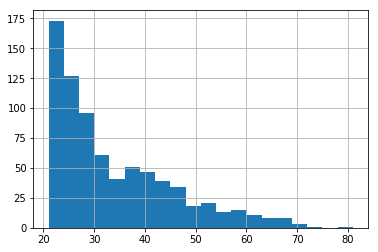

In [17]:
diabetes['Age'].hist(bins = 20)

In [18]:
# now we are taking the age with a conitnious value to categorical value 
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [19]:
age_bucket

BucketizedColumn(source_column=NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

In [20]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_bucket]

In [21]:
# TRAIN TEST SPLIT
x_data = diabetes.drop('Class',axis=1)

In [22]:
labels= diabetes['Class']

In [23]:

x_data.head()


,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [24]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [27]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                                        batch_size = 10,num_epochs=1000,shuffle = True)

In [28]:
# we are using classifaction so let;s do linear classifer
model  = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_task_type': 'worker', '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmp66zeks6g', '_train_distribute': None, '_save_checkpoints_secs': 600, '_evaluation_master': '', '_tf_random_seed': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_device_fn': None, '_protocol': None, '_save_checkpoints_steps': None, '_eval_distribute': None, '_experimental_distribute': None, '_global_id_in_cluster': 0, '_is_chief': True, '_task_id': 0, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a27c0f780>, '_service': None, '_master': '', '_keep_checkpoint_max': 5, '_log_step_count_steps': 100}


In [29]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmp66zeks6g/model.ckpt.
INFO:tensorflow:loss = 0.6

In [30]:
# now let's start evaluating the model
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,y= y_test,batch_size=10,
                                                                num_epochs=1,shuffle=False)

In [31]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-09T08:11:14Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmp66zeks6g/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-09-08:11:15
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.79930043, auc_precision_recall = 0.6353735, average_loss = 0.52764004, global_step = 1000, label/mean = 0.35064936, loss = 0.52554375, precision = 0.65625, prediction/mean = 0.36381775, recall = 0.5185185
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmp66zeks6g/model.ckpt-1000


In [32]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79930043,
 'auc_precision_recall': 0.6353735,
 'average_loss': 0.52764004,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 0.52554375,
 'precision': 0.65625,
 'prediction/mean': 0.36381775,
 'recall': 0.5185185}

In [33]:
# well we got around 74% accuracy let's start with predictions
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [34]:
predictios = model.predict(pred_input_func)

In [35]:
my_pred = list(predictios)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmp66zeks6g/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [36]:
# dnn if we want 3 layers of 10 neurons each
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_task_type': 'worker', '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpxtvjqarg', '_train_distribute': None, '_save_checkpoints_secs': 600, '_evaluation_master': '', '_tf_random_seed': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_device_fn': None, '_protocol': None, '_save_checkpoints_steps': None, '_eval_distribute': None, '_experimental_distribute': None, '_global_id_in_cluster': 0, '_is_chief': True, '_task_id': 0, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a299f4438>, '_service': None, '_master': '', '_keep_checkpoint_max': 5, '_log_step_count_steps': 100}


In [37]:
#we can't simply train DNN similar to Linearclassifer

In [38]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [39]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_bucket]

In [40]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y = y_train,num_epochs=1000,batch_size=10,shuffle=True)

In [41]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_task_type': 'worker', '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpffz498l9', '_train_distribute': None, '_save_checkpoints_secs': 600, '_evaluation_master': '', '_tf_random_seed': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_device_fn': None, '_protocol': None, '_save_checkpoints_steps': None, '_eval_distribute': None, '_experimental_distribute': None, '_global_id_in_cluster': 0, '_is_chief': True, '_task_id': 0, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a29b110b8>, '_service': None, '_master': '', '_keep_checkpoint_max': 5, '_log_step_count_steps': 100}


In [42]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpffz498l9/model.ckpt.
INFO:tensorflow:loss = 0.713452, step = 0
INFO:tensorflow:global_step/sec: 189.509
INFO:tensorflow:loss = 0.6531026, step = 100 (0.528 sec)
INFO:tensorflow:global_step/sec: 261.239
INFO:tensorflow:loss = 0.55234057, step = 200 (0.392 

In [43]:
#let's evaluate the dnnmodel
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,y = y_test,
                                                                batch_size=10,num_epochs=1,shuffle=False)

In [44]:
dnn_model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-09T08:11:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpffz498l9/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-09-08:11:27
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.82436216, auc_precision_recall = 0.66890705, average_loss = 0.4894494, global_step = 1000, label/mean = 0.35064936, loss = 0.48324183, precision = 0.67105263, prediction/mean = 0.36335108, recall = 0.6296296
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpffz498l9/model.ckpt-1000


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82436216,
 'auc_precision_recall': 0.66890705,
 'average_loss': 0.4894494,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 0.48324183,
 'precision': 0.67105263,
 'prediction/mean': 0.36335108,
 'recall': 0.6296296}